In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


/Users/aparnasiva/anaconda3/envs/python-3.6fortensor/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

In [3]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [4]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [6]:
# Step 3 - Flattening
classifier.add(Flatten())

In [7]:
# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu')) # I changed it to 256 multipleof 16
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [8]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [9]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('helmet_detection/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 647 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('helmet_detection/testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 208 images belonging to 2 classes.


In [13]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 600,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 200)

Epoch 1/10
600/600 [==============================] - 64s 107ms/step - loss: 0.2763 - acc: 0.8770 - val_loss: 0.3177 - val_acc: 0.8609
Epoch 2/10
600/600 [==============================] - 64s 106ms/step - loss: 0.0817 - acc: 0.9701 - val_loss: 0.1272 - val_acc: 0.9670
Epoch 3/10
600/600 [==============================] - 64s 107ms/step - loss: 0.0438 - acc: 0.9851 - val_loss: 0.0880 - val_acc: 0.9709
Epoch 4/10
600/600 [==============================] - 64s 106ms/step - loss: 0.0317 - acc: 0.9885 - val_loss: 0.1240 - val_acc: 0.9761
Epoch 5/10
600/600 [==============================] - 63s 105ms/step - loss: 0.0256 - acc: 0.9906 - val_loss: 0.1055 - val_acc: 0.9761
Epoch 6/10
600/600 [==============================] - 65s 109ms/step - loss: 0.0091 - acc: 0.9969 - val_loss: 0.1653 - val_acc: 0.9757
Epoch 7/10
600/600 [==============================] - 64s 107ms/step - loss: 0.0245 - acc: 0.9914 - val_loss: 0.1743 - val_acc: 0.9714
Epoch 8/10
600/600 [==============================] - 6

In [30]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('helmet_detection/single_prediction/abe.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

{'with helmet': 0, 'without helmet': 1}

In [31]:
image1=image.load_img('helmet_detection/single_prediction/abe.jpg', target_size = (200,200))

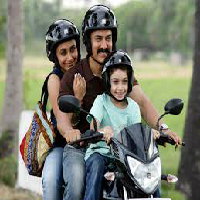

In [32]:
image1

In [33]:
if result[0][0] == 1:
    prediction = 'without helmet'
else:
    prediction = 'with helmet'

In [34]:
prediction


'with helmet'